<hr style="border:2px solid black"></hr>

# Deliverables

<hr style="border:2px solid black"></hr>

<hr style="border:1px solid black"></hr>

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

<hr style="border:1px solid black"></hr>

First we need to gather the data and evaluate its quality. Then we need to make decisions on how to clean the data by removing non-useful information and dealing with missing values. Then, we need to construct a model which will evaluate the features of the data and tell us which ones are most important in determining the price of a used car. Finally, we need to test our model to ensure that it does indeed reproduce (to a tolerable level) the actual prices of the cars. Once the model is complete, it can be used to predict the price of new items based on the features used to train it.

<hr style="border:1px solid black"></hr>

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

<hr style="border:1px solid black"></hr>

The first step is to see how sparse (or dense) the data is. If there are features that are only available for a handful of cars, then it is not a good idea to train our model on them as a new data point is also not likely to have that feature. Next, if there are features that are missing only a small percentage of values, then we need to decide on a "filler" value to replace the Null value that is present. Finally, we want to combine columns that are closely related (but different) to reduce the overall number of dimensions of the problem.

<hr style="border:1px solid black"></hr>

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

<hr style="border:1px solid black"></hr>

After cleaning the data, we need to identify the data types for each of the features so that we can build column transformers and scalers where appropriate.

<hr style="border:1px solid black"></hr>

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

<hr style="border:1px solid black"></hr>

*See Analysis Section

<hr style="border:1px solid black"></hr>

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

<hr style="border:1px solid black"></hr>

Based on the analysis below, the most important factor for used car sale price is "location, location, location". After removing location as a consideration, the biggest drivers of price are: year, model, fuel, transmission, drive, and size.

<center>
    <img src = './images/features.png' >
</center>

<hr style="border:1px solid black"></hr>

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

<hr style="border:1px solid black"></hr>

After identifying the drivers of used car prices, the next step is to identify those car models which will improve sales at the lot the best. Based on the best model fit on the data, those models are:

In [19]:
display(pd.DataFrame(coef_df["Feature"][0:20]))

,Feature
0,"nissan, titan se kingcab"
1,"ford, f350 super duty lariat"
2,"toyota, tundra"
3,"toyota, 4runner"
4,"gmc, sierra 2500"
5,"buick, regal"
6,"saturn, l-series l200 4dr sedan"
7,"chevrolet, truck"
8,"volkswagen, 23-window samba deluxe"
9,"nissan, 370z nismo tech"


<hr style="border:2px solid black"></hr>

# Analysis

<hr style="border:2px solid black"></hr>

<hr style="border:1px solid black"></hr>

## Import Libraries and Functions

<hr style="border:1px solid black"></hr>

In [1]:
from sklearn.linear_model import LinearRegression, Ridge, HuberRegressor
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, Normalizer, OrdinalEncoder
from sklearn.compose import make_column_transformer, make_column_selector, TransformedTargetRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer, accuracy_score
from sklearn import set_config
set_config(display="diagram")


import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import time as time
import warnings

warnings.filterwarnings("ignore", category = UserWarning)
pd.set_option('display.max_colwidth', None)

<hr style="border:1px solid black"></hr>

## Clean the Data

<hr style="border:1px solid black"></hr>

---
### Import the Data From the File
---

In [2]:
data_df = pd.read_csv('./data/vehicles.csv')

---
### View the Initial Data
---

In [3]:
display(data_df.head())

data_df.info()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

---
### Combine Related Columns
---

In [4]:
data_cleaned = data_df.copy()

data_cleaned['region'] = data_df['region'] + ', ' + data_df['state']

data_cleaned['model'].fillna(data_cleaned['type'], inplace = True)

data_cleaned['model'] = data_cleaned['manufacturer'] + ', ' + data_cleaned['model']

---
### Convert Eligible Columns to Numeric Values
---

In [5]:
data_cleaned['cylinders'] = data_cleaned['cylinders'].str.split(expand = True)[0]
data_cleaned['cylinders'].replace({'other' : 0}, inplace = True)
data_cleaned['cylinders'] = pd.to_numeric(data_cleaned['cylinders'])

data_cleaned['condition'].replace({'salvage' : 1, 'fair' : 2, 'good' : 3, 'excellent' : 4, 'like new' : 5, 'new' : 6}, inplace = True)
data_cleaned['condition'] = pd.to_numeric(data_cleaned['condition'])

data_cleaned['title_status'].replace({'missing' : 1, 'parts only' : 2, 'salvage' : 3, 'lien' : 4, 'rebuilt' : 5, 'clean' : 6}, inplace = True)
data_cleaned['title_status'] = pd.to_numeric(data_cleaned['title_status'])

---
### Remove Extraneous Columns
---

In [6]:
data_cleaned = data_cleaned.drop(['id', 'VIN', 'state', 'manufacturer', 'type'], axis = 1)

---
### Remove Rows with Many Missing Values
---

In [7]:
row_nan_count = pd.DataFrame({"nan_count" : data_cleaned.isna().sum(axis=1)})

many_missing_index = row_nan_count.query("nan_count > 5").index

data_cleaned = data_cleaned.drop(many_missing_index, axis = 0)

---
### Remove Entries with Target Value 0
---

In [8]:
data_cleaned = data_cleaned.query("price > 0")

---
### View the Cleaned Data
---

In [9]:
display(data_cleaned.tail())

data_cleaned.info()

,region,price,year,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,paint_color
426875,"wyoming, wy",23590,2019.0,"nissan, maxima s sedan 4d",3.0,6.0,gas,32226.0,6.0,other,fwd,NaN,NaN
426876,"wyoming, wy",30590,2020.0,"volvo, s60 t5 momentum sedan 4d",3.0,NaN,gas,12029.0,6.0,other,fwd,NaN,red
426877,"wyoming, wy",34990,2020.0,"cadillac, xt4 sport suv 4d",3.0,NaN,diesel,4174.0,6.0,other,NaN,NaN,white
426878,"wyoming, wy",28990,2018.0,"lexus, es 350 sedan 4d",3.0,6.0,gas,30112.0,6.0,other,fwd,NaN,silver
426879,"wyoming, wy",30590,2019.0,"bmw, 4 series 430i gran coupe",3.0,NaN,gas,22716.0,6.0,other,rwd,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Index: 389008 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        389008 non-null  object 
 1   price         389008 non-null  int64  
 2   year          388047 non-null  float64
 3   model         374869 non-null  object 
 4   condition     242592 non-null  float64
 5   cylinders     233374 non-null  float64
 6   fuel          387231 non-null  object 
 7   odometer      387115 non-null  float64
 8   title_status  382158 non-null  float64
 9   transmission  387654 non-null  object 
 10  drive         273366 non-null  object 
 11  size          111052 non-null  object 
 12  paint_color   276630 non-null  object 
dtypes: float64(5), int64(1), object(7)
memory usage: 41.6+ MB


---
### Separate the Target Data
---

In [10]:
X = data_cleaned.drop('price', axis = 1)
y = data_cleaned['price']

<hr style="border:1px solid black"></hr>

## Find the Most Important Columns Through Regression Feature Selection

<hr style="border:1px solid black"></hr>

---
### Create a Function to get the Most Important Features
---

In [11]:
##====================================================================================================##
## Function:    feature_selection                                                                     ##
##                                                                                                    ##
## DESCRIPTION: This function is used to rank features by importance.                                 ##
##                                                                                                    ##
## INPUT(S):    1) X:             Feature data                                                        ##
##              2) y:             Target data                                                         ##
##              3) tranformer:    Data column transformer                                             ##
##              4) selectors:     List of models used during feature selection                        ##
##              5) regressors:    List of models used during regression                               ##
##              6) score_method:  Method used to generate model scores                                ##
##              7) n_runs:        Number of cross-validation re-runs                                  ##
##              8) plot:          Boolean value, if true a plot of the importances is made            ##
##                                                                                                    ##
## OUTPUT(S):   1) X_return:      Streamlined feature data                                            ##
##              2) importance_df: Category importance data                                            ##
##====================================================================================================##

def feature_selection(X, y, transformer, selectors, regressors, score_method, n_runs, make_plot):

    ##------------------------------------------------------------------------------------------------##
    ## Create lists to store the best model score and features:                                       ##
    ##------------------------------------------------------------------------------------------------##

    model_features = []
    model_scores   = []

    for selector in selectors:

        for regressor in regressors:

            ti = time.time()

            print("Testing Selector:" + str(selector) + " and Regressor: " + str(regressor))
    
            pipe = Pipeline([

                ('transformer', transformer),
                ('selector',    SelectFromModel(selector())),
                ('regression',  regressor())
            ])


            ##----------------------------------------------------------------------------------------##
            ## Repeat the feature selection n_repeats times for cross-validation purposes:            ##
            ##----------------------------------------------------------------------------------------##
    
            for run in range(0, n_runs):

                ##------------------------------------------------------------------------------------##
                ## Split the data into training and testing subsets:                                  ##
                ##------------------------------------------------------------------------------------##

                X_train, X_test, y_train, y_test = train_test_split(X, y)

                ##------------------------------------------------------------------------------------##
                ## Fit the pipeline:                                                                  ##
                ##------------------------------------------------------------------------------------##
        
                pipe.fit(X_train, y_train)

                ##------------------------------------------------------------------------------------##
                ## Get the pipe score for this run given the chosen scoring method:                   ##
                ##------------------------------------------------------------------------------------##

                model_scores.append(score_method(pipe.predict(X_test), y_test))

                ##------------------------------------------------------------------------------------##
                ## Get the feature names:                                                             ##
                ##------------------------------------------------------------------------------------##

                transformer_names = pipe['transformer'].get_feature_names_out()

                feature_names = list(pipe['selector'].get_feature_names_out(transformer_names))

                ##------------------------------------------------------------------------------------##
                ## Reverse feature names (thus index proxies for importance):                         ##
                ##------------------------------------------------------------------------------------##

                feature_names.reverse()

                ##------------------------------------------------------------------------------------##
                ## Get the category names:                                                            ##
                ##------------------------------------------------------------------------------------##

                category_list = list(X.columns)

                ##------------------------------------------------------------------------------------##
                ## Create lists for computing importance score:                                       ##
                ##------------------------------------------------------------------------------------##

                feature_score_list = np.zeros(len(category_list))

                remove_idx = []

                cleaned_feature_names = []

                ##------------------------------------------------------------------------------------##
                ## Compute importance score:                                                          ##
                ##------------------------------------------------------------------------------------##

                for i in range(0, len(feature_names)):

                    for j in range(0, len(category_list)):

                        if (category_list[j] in feature_names[i]):

                            feature_score_list[j] += i

                            cleaned_feature_names.append(category_list[j])

                            remove_idx.append(i)
        
                ##------------------------------------------------------------------------------------##
                ## Detect any unused features:                                                        ##
                ##------------------------------------------------------------------------------------##
            
                remainder = np.delete(feature_names, remove_idx)

                if (len(remainder) > 0): print("Unclassified Features Remain!")

                ##------------------------------------------------------------------------------------##
                ## Count the number of times a category appears in the feature list:                  ##
                ##------------------------------------------------------------------------------------##
        
                count_list = []

                for i in range(0, len(category_list)):

                    count_list.append(cleaned_feature_names.count(category_list[i]))

                    ##--------------------------------------------------------------------------------##
                    ## Replace 0s with 1s in count_list to avoid division by zero:                    ##
                    ##--------------------------------------------------------------------------------##

                    count_list = [x or 1 for x in count_list]

                ##------------------------------------------------------------------------------------##
                ## Scale the category score by count_list and normalize:                              ##
                ##------------------------------------------------------------------------------------##

                feature_score_list /= count_list

                feature_score_list /= np.max(feature_score_list)

                model_features.append(feature_score_list)

            ##----------------------------------------------------------------------------------------##
            ## Report the time to test the model:                                                     ##
            ##----------------------------------------------------------------------------------------##

            tf = time.time()

            print("Model Test Time: " + str(np.round(tf - ti, 2)) + '\n')

    ##------------------------------------------------------------------------------------------------##
    ## Get the best features for the current model based on the chosen scoring method:                ##
    ##------------------------------------------------------------------------------------------------##

    importance_df = pd.DataFrame({"Category" : X.columns})
    importance_df.set_index("Category", inplace = True)

    importance_df["Score"] = 0

    for run in range(0, n_runs):

        importance_df["Score"] += model_features[run] / n_runs

    importance_df["Score"] /= importance_df["Score"].max()

    importance_df.sort_values("Score", ascending = False, inplace = True)

    ##------------------------------------------------------------------------------------------------##
    ## If desired, create a plot of the feature importances:                                          ##
    ##------------------------------------------------------------------------------------------------##

    if (make_plot == True):

        figure = plt.figure(figsize = (12, 4))

        graph_1 = figure.add_axes([0.0, 0.0, 1.0, 1.0])

        graph_2 = figure.add_axes([1.1, 0.0, 0.3, 1.0])

        graph_2.axis('off')

        bbox = [0, 0, 1, 1]

        score_table = graph_2.table(cellText = np.round(importance_df.values, 5), \
                                    rowLabels = importance_df.index, bbox = bbox, \
                                    colLabels = importance_df.columns)

        graph_1.set_title('Category Importance using Regression Feature Selection')

        importance_df["Score"].plot.bar(ax = graph_1)

        graph_1.set_xlabel('')

        graph_1.set_ylabel('Relative Importance')

        graph_1.tick_params(axis='x', rotation = 45)

        graph_1.grid()

        plt.show()

    ##------------------------------------------------------------------------------------------------##
    ## Create the streamlined feature data:                                                           ##
    ##------------------------------------------------------------------------------------------------##

    drop_list = list(importance_df.query("Score < 0.01").index)

    X_return = X.drop(drop_list, axis = 1)

    if (make_plot == True): display(X_return.tail())

    ##------------------------------------------------------------------------------------------------##
    ## Return the streamlined feature data and the category importance data:                          ##
    ##------------------------------------------------------------------------------------------------##

    return X_return, importance_df

---
### Create the Column Transformer
---

In [12]:
##----------------------------------------------------------------------------------------------------##
## Create the DataType selector:                                                                      ##
##----------------------------------------------------------------------------------------------------##

selector = make_column_selector(dtype_include = 'object')

##----------------------------------------------------------------------------------------------------##
## Create the transformer pipelines:                                                                  ##
##----------------------------------------------------------------------------------------------------##

categorical_transformer = Pipeline([
    
    ('imputer',  SimpleImputer(strategy = 'constant', fill_value = 'missing')),
    ('onehot',   OneHotEncoder(handle_unknown = 'ignore', drop = 'first'))
])

numerical_transformer = Pipeline([
    
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

##----------------------------------------------------------------------------------------------------##
## Create the column transformer:                                                                     ##
##----------------------------------------------------------------------------------------------------##

transformer = \
    make_column_transformer((categorical_transformer, selector), remainder = numerical_transformer)

---
### Get the Category Importances
---

Testing Selector:<class 'sklearn.linear_model._ridge.Ridge'> and Regressor: <class 'sklearn.linear_model._ridge.Ridge'>
Model Test Time: 36.69

Testing Selector:<class 'sklearn.linear_model._ridge.Ridge'> and Regressor: <class 'sklearn.linear_model._base.LinearRegression'>
Model Test Time: 38.56

Testing Selector:<class 'sklearn.linear_model._ridge.Ridge'> and Regressor: <class 'sklearn.linear_model._huber.HuberRegressor'>
Model Test Time: 46.57

Testing Selector:<class 'sklearn.linear_model._base.LinearRegression'> and Regressor: <class 'sklearn.linear_model._ridge.Ridge'>
Model Test Time: 18.77

Testing Selector:<class 'sklearn.linear_model._base.LinearRegression'> and Regressor: <class 'sklearn.linear_model._base.LinearRegression'>
Model Test Time: 18.72

Testing Selector:<class 'sklearn.linear_model._base.LinearRegression'> and Regressor: <class 'sklearn.linear_model._huber.HuberRegressor'>
Model Test Time: 29.79

Testing Selector:<class 'sklearn.linear_model._huber.HuberRegressor'

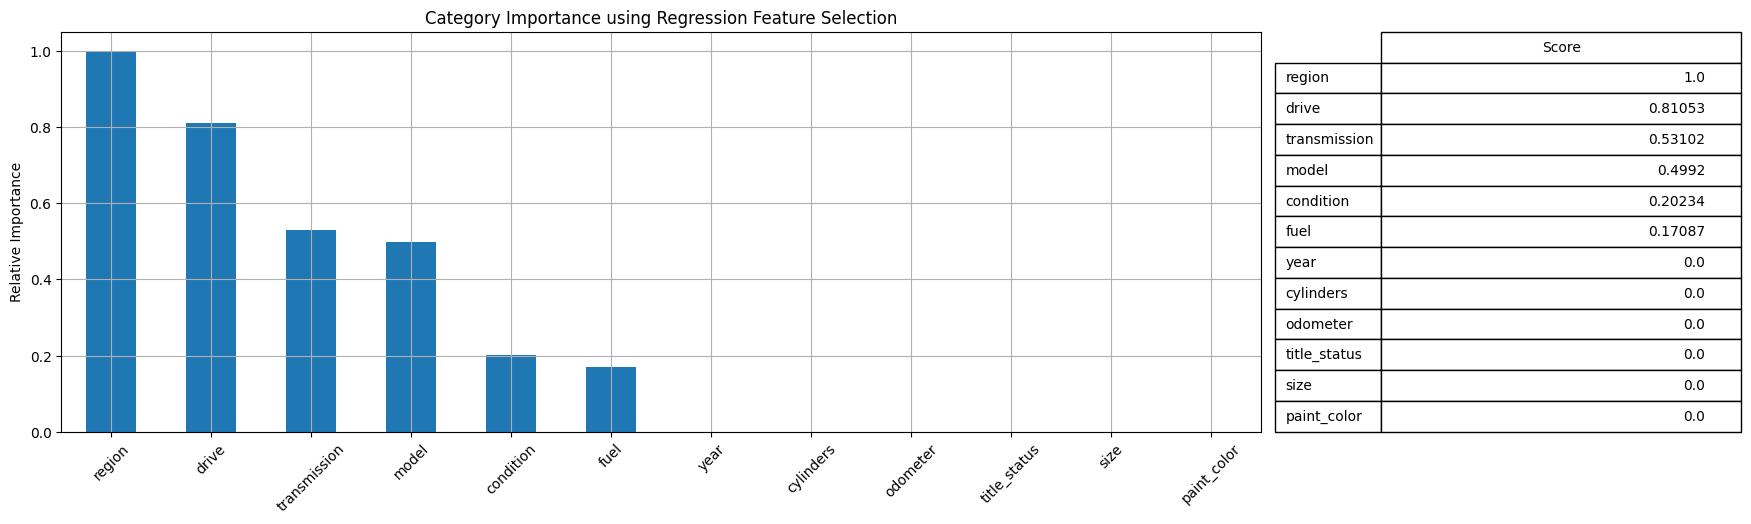

,region,model,condition,fuel,transmission,drive
426875,"wyoming, wy","nissan, maxima s sedan 4d",3.0,gas,other,fwd
426876,"wyoming, wy","volvo, s60 t5 momentum sedan 4d",3.0,gas,other,fwd
426877,"wyoming, wy","cadillac, xt4 sport suv 4d",3.0,diesel,other,NaN
426878,"wyoming, wy","lexus, es 350 sedan 4d",3.0,gas,other,fwd
426879,"wyoming, wy","bmw, 4 series 430i gran coupe",3.0,gas,other,rwd


In [13]:
##----------------------------------------------------------------------------------------------------##
## Create the lists of selectors and regressors:                                                      ##
##----------------------------------------------------------------------------------------------------##

selectors   = [Ridge, LinearRegression, HuberRegressor]
regressors  = [Ridge, LinearRegression, HuberRegressor]

##----------------------------------------------------------------------------------------------------##
## Run the Feature Selection Function:                                                                ##
##----------------------------------------------------------------------------------------------------##

X2, category_importance_df = \
    feature_selection(X, y, transformer, selectors, regressors, mean_squared_error, 2, True)

<hr style="border:1px solid black"></hr>

## Feature Selection (Without Region Column)

<hr style="border:1px solid black"></hr>

In [14]:
##----------------------------------------------------------------------------------------------------##
## Drop the region column from the feature data:                                                      ##
##----------------------------------------------------------------------------------------------------##

X3 = X.drop("region", axis = 1)

---
### Get the Category Importances
---

Testing Selector:<class 'sklearn.linear_model._ridge.Ridge'> and Regressor: <class 'sklearn.linear_model._ridge.Ridge'>
Model Test Time: 29.96

Testing Selector:<class 'sklearn.linear_model._ridge.Ridge'> and Regressor: <class 'sklearn.linear_model._base.LinearRegression'>
Model Test Time: 32.43

Testing Selector:<class 'sklearn.linear_model._ridge.Ridge'> and Regressor: <class 'sklearn.linear_model._huber.HuberRegressor'>
Model Test Time: 45.32

Testing Selector:<class 'sklearn.linear_model._base.LinearRegression'> and Regressor: <class 'sklearn.linear_model._ridge.Ridge'>
Model Test Time: 16.22

Testing Selector:<class 'sklearn.linear_model._base.LinearRegression'> and Regressor: <class 'sklearn.linear_model._base.LinearRegression'>
Model Test Time: 16.31

Testing Selector:<class 'sklearn.linear_model._base.LinearRegression'> and Regressor: <class 'sklearn.linear_model._huber.HuberRegressor'>
Model Test Time: 27.47

Testing Selector:<class 'sklearn.linear_model._huber.HuberRegressor'

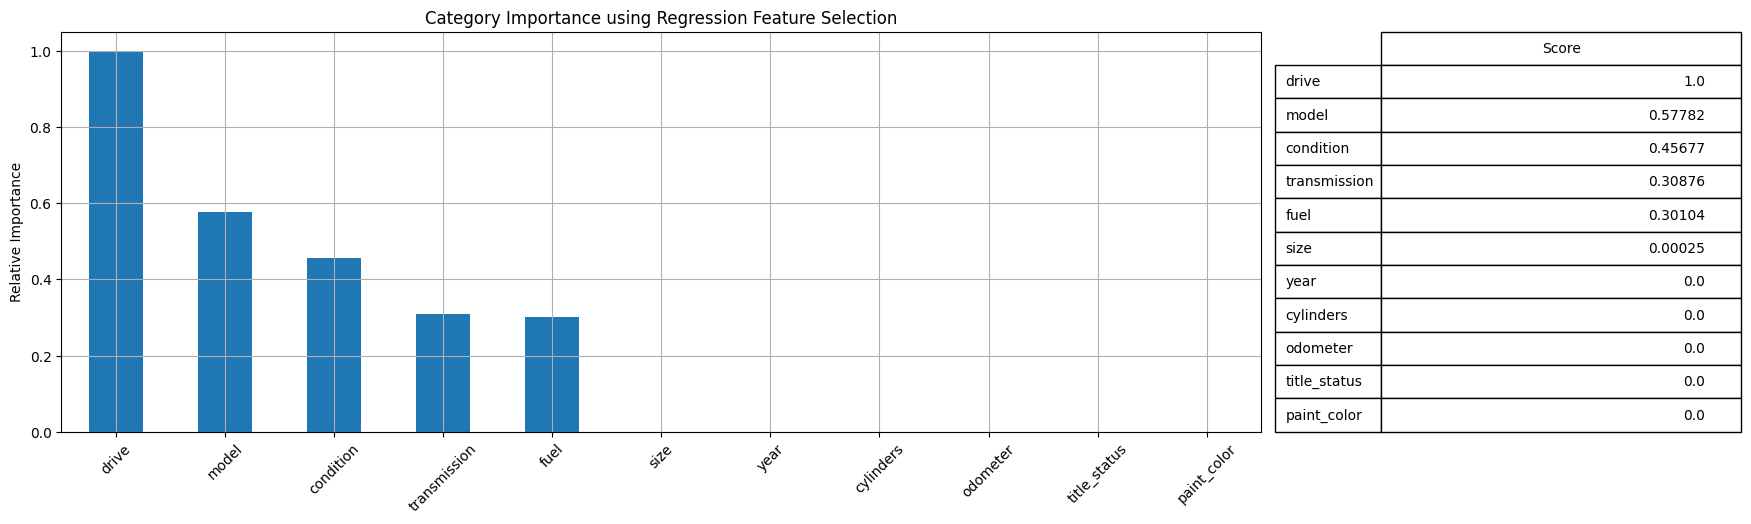

,model,condition,fuel,transmission,drive
426875,"nissan, maxima s sedan 4d",3.0,gas,other,fwd
426876,"volvo, s60 t5 momentum sedan 4d",3.0,gas,other,fwd
426877,"cadillac, xt4 sport suv 4d",3.0,diesel,other,NaN
426878,"lexus, es 350 sedan 4d",3.0,gas,other,fwd
426879,"bmw, 4 series 430i gran coupe",3.0,gas,other,rwd


In [15]:
##----------------------------------------------------------------------------------------------------##
## Create the lists of selectors and regressors:                                                      ##
##----------------------------------------------------------------------------------------------------##

selectors   = [Ridge, LinearRegression, HuberRegressor]
regressors  = [Ridge, LinearRegression, HuberRegressor]

##----------------------------------------------------------------------------------------------------##
## Run the Feature Selection Function:                                                                ##
##----------------------------------------------------------------------------------------------------##

X4, category_importance_df \
    = feature_selection(X3, y, transformer, selectors, regressors, mean_squared_error, 2, True)

---
### Drop All Rows with many NaN Values
---

In [16]:
row_nan_count = pd.DataFrame({"nan_count" : X4.isna().sum(axis=1)})

many_missing_index = row_nan_count.query("nan_count > 0").index

X5 = X4.drop(many_missing_index, axis = 0)

y5 = y.drop(many_missing_index, axis = 0)

---
### Find the Best Model to Fit the Reduced Data
---

In [17]:
##----------------------------------------------------------------------------------------------------##
## Create pipelines for the parameter grid search:                                                    ##
##----------------------------------------------------------------------------------------------------##

ridge_pipe = Pipeline([

    ('transformer', transformer),
    ('model', Ridge())
])

linear_pipe = Pipeline([

    ('transformer', transformer),
    ('model', LinearRegression())
])

huber_pipe = Pipeline([

    ('transformer', transformer),
    ('model', HuberRegressor())
])

##----------------------------------------------------------------------------------------------------##
## Create dictionaries for the search parameters:                                                     ##
##----------------------------------------------------------------------------------------------------##

ridge_params  = {
    
    "model__alpha"         : [720_000], # np.linspace(700_000, 800_000, 11), # np.logspace(5, 7, 10),
    "model__fit_intercept" : [False],   # [True, False],
    "model__solver"        : ['lsqr']   # ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 
                                        #  'sag', 'saga', 'lbfgs']
}

linear_params = {
    
    "model__fit_intercept" : [True] # [True, False]
}

huber_params  = {
    
    "model__fit_intercept" : [True], # [True, False]
    "model__epsilon"       : [8], # np.linspace(1, 10, 10)
    "model__alpha"         : [0.00000001], # np.logspace(-10, 0, 11)
}

##----------------------------------------------------------------------------------------------------##
## Create dictionaries combining the models and parameters:                                           ##
##----------------------------------------------------------------------------------------------------##

pipe_list = {
    "Regressor"  : ["Ridge", "Linear", "Huber"],
    "Pipe"       : [ridge_pipe, linear_pipe, huber_pipe],
    "Parameters" : [ridge_params, linear_params, huber_params]
}

##----------------------------------------------------------------------------------------------------##
## Split the feature and target data into training and testing subsets:                               ##
##----------------------------------------------------------------------------------------------------##

X_train, X_test, y_train, y_test = train_test_split(X5, y5, random_state = 0)

##----------------------------------------------------------------------------------------------------##
## Create lists to store the results of the grid search:                                              ##
##----------------------------------------------------------------------------------------------------##

rmse_list   = []
best_params = []

##----------------------------------------------------------------------------------------------------##
## Loop over the regressors in the regressor list:                                                    ##
##----------------------------------------------------------------------------------------------------##

for i in range(0, len(pipe_list["Regressor"])):

    print("Running Search For " + pipe_list["Regressor"][i] + " Regression.\n")

    ##------------------------------------------------------------------------------------------------##
    ## Get the start time of the grid search:                                                         ##
    ##------------------------------------------------------------------------------------------------##

    ti = time.time()

    ##------------------------------------------------------------------------------------------------##
    ## Get the pipeline and parameters for the current regressor:                                     ##
    ##------------------------------------------------------------------------------------------------##

    pipe   = pipe_list["Pipe"][i]
    
    params = pipe_list["Parameters"][i]

    ##------------------------------------------------------------------------------------------------##
    ## Perform the grid search:                                                                       ##
    ##------------------------------------------------------------------------------------------------##

    grid = GridSearchCV(pipe, param_grid = params, cv = 3)

    grid.fit(X5, y5)

    ##------------------------------------------------------------------------------------------------##
    ## Get the results and rmse of the grid search:                                                   ##
    ##------------------------------------------------------------------------------------------------##

    grid_preds = grid.best_estimator_.predict(X5)

    rmse = np.sqrt(mean_squared_error(y5, grid_preds))

    rmse_list.append(rmse)

    best_params.append(grid.best_params_)

    ##------------------------------------------------------------------------------------------------##
    ## Get the end time of the grid search and report the grid search duration:                       ##
    ##------------------------------------------------------------------------------------------------##

    tf = time.time()

    print("Search Time: " + str(np.round(tf - ti, 2)) + '\n\n')

##----------------------------------------------------------------------------------------------------##
## Place grid search results into a DataFrame:                                                        ##
##----------------------------------------------------------------------------------------------------##

results_df = pd.DataFrame()

results_df["Regressor"] = pipe_list["Regressor"]

results_df["RMSE"] = rmse_list

results_df["Best Parameters"] = best_params

##----------------------------------------------------------------------------------------------------##
## Get the best model and best model's parameters from the grid search:                               ##
##----------------------------------------------------------------------------------------------------##

best_rmse = np.min(rmse_list)

best_model = results_df.query("RMSE == @best_rmse")["Regressor"].values[0]

best_model_params = results_df.query("RMSE == @best_rmse")["Best Parameters"].values[0]

results_df.sort_values("RMSE", ascending = True, inplace = True)

results_df.reset_index(inplace = True)

display(results_df)

Running Search For Ridge Regression.

Search Time: 3.29


Running Search For Linear Regression.

Search Time: 4.52


Running Search For Huber Regression.

Search Time: 18.72




,index,Regressor,RMSE,Best Parameters
0,1,Linear,1.285569e+07,{'model__fit_intercept': True}
1,2,Huber,1.288294e+07,"{'model__alpha': 1e-08, 'model__epsilon': 8, 'model__fit_intercept': True}"
2,0,Ridge,1.288294e+07,"{'model__alpha': 720000, 'model__fit_intercept': False, 'model__solver': 'lsqr'}"


---
### Get the Best Model's Coefficients
---

In [18]:
##----------------------------------------------------------------------------------------------------##
## Create the Best Model's Pipeline:                                                                  ##
##----------------------------------------------------------------------------------------------------##

if (best_model == 'Linear'): model = LinearRegression

if (best_model == 'Ridge'):  model = Ridge

if (best_model == 'Huber'):  model = HuberRegressor

pipe_params = {a.replace("model__", ""):b for a, b in best_model_params.items()}

pipe = Pipeline([

    ('transformer', transformer),
    ('model',       model(**pipe_params))
])

##----------------------------------------------------------------------------------------------------##
## Fit the Best Model Pipeline:                                                                       ##
##----------------------------------------------------------------------------------------------------##

pipe.fit(X5, y5)

##----------------------------------------------------------------------------------------------------##
## Get the Best Model's Coefficients:                                                                 ##
##----------------------------------------------------------------------------------------------------##

names = pipe["transformer"].get_feature_names_out()
coefs = pipe["model"].coef_

coef_df = pd.DataFrame({"Feature" : names, "Coefs" : coefs})

coef_df["Coefs"] = coef_df["Coefs"] / np.max(np.abs(coef_df["Coefs"]))

coef_df.sort_values("Coefs", ascending = False, inplace = True)

coef_df.rename(columns = {"Coefs" : "Normalized Coefs"}, inplace = True)

features = [a.replace("pipeline__model_", "") for a in coef_df["Feature"].values]

coef_df["Feature"] = features

coef_df.reset_index(inplace = True)
coef_df.drop("index", axis = 1, inplace = True)

display(coef_df[0:20])

,Feature,Normalized Coefs
0,"nissan, titan se kingcab",1.000000
1,"ford, f350 super duty lariat",0.329122
2,"toyota, tundra",0.057286
3,"toyota, 4runner",0.050141
4,"gmc, sierra 2500",0.020480
5,"buick, regal",0.013053
6,"saturn, l-series l200 4dr sedan",0.008931
7,"chevrolet, truck",0.005341
8,"volkswagen, 23-window samba deluxe",0.003384
9,"nissan, 370z nismo tech",0.003255
